In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline 

In [7]:
df=pd.read_csv("US_Accident.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.shape

(7728394, 46)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df_cleaned=df.copy()

In [12]:
cols_to_drop = [
    'ID', 'Source', 'Description',
    'Street', 'Number', 'Side', 'Zipcode', 'County', 'City',
    'End_Lat', 'End_Lng','Start_Lat','Start_Lng',
    'Timezone', 'Airport_Code',
    'Weather_Timestamp', 'Wind_Chill(F)', 'Wind_Direction',
    'Wind_Gust(mph)', 'Pressure(in)', 'Precipitation(in)',
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

df_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [13]:
df_cleaned.head()

,Severity,Start_Time,End_Time,Distance(mi),State,Country,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,US,36.9,91.0,10.0,NaN,Light Rain,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,US,37.9,100.0,10.0,NaN,Light Rain,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,OH,US,36.0,100.0,10.0,3.5,Overcast,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,OH,US,35.1,96.0,9.0,4.6,Mostly Cloudy,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,OH,US,36.0,89.0,6.0,3.5,Mostly Cloudy,Day,Day,Day,Day


In [14]:
df_cleaned['Start_Time']=pd.to_datetime(df_cleaned['Start_Time'],  errors='coerce')

In [15]:
df_cleaned['Day']=df_cleaned['Start_Time'].dt.day.astype('Int64')
df_cleaned['Month']=df_cleaned['Start_Time'].dt.month.astype('Int64')
df_cleaned['Year']=df_cleaned['Start_Time'].dt.year.astype('Int64')
df_cleaned['Hour']=df_cleaned['Start_Time'].dt.hour
df_cleaned['Weekday']=df_cleaned['Start_Time'].dt.day_name()

In [16]:
df_cleaned['Weekday']

0          Monday
1          Monday
2          Monday
3          Monday
4          Monday
            ...  
7728389    Friday
7728390    Friday
7728391    Friday
7728392    Friday
7728393    Friday
Name: Weekday, Length: 7728394, dtype: object

In [17]:
df_cleaned['Severity'].value_counts(normalize=True)

Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: proportion, dtype: float64

In [18]:
df_cleaned['High_Severity']=df_cleaned['Severity']>=3

In [19]:
df_cleaned['High_Severity'].unique()

array([ True, False])

In [20]:
df_cleaned['Wind_Speed(mph)'].isnull().sum()

np.int64(571233)

In [21]:
df_cleaned['Wind_Speed(mph)'] = df_cleaned['Wind_Speed(mph)'].fillna(
    df_cleaned['Wind_Speed(mph)'].median()
)


In [24]:
df_sample = df_cleaned.sample(10000, random_state=42)
df_sample.to_csv("data/US_accidents_sample.csv", index=False)

In [25]:
df_cleaned.to_csv('data/US_accidents_cleaned.csv')

Text(0.5, 1.0, 'Accident Severity Distribution (%)')

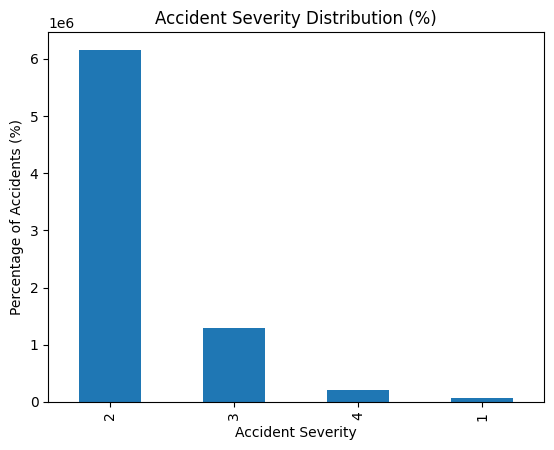

In [26]:
df_cleaned['Severity'].value_counts().plot(kind='bar')
plt.ylabel('Percentage of Accidents (%)')
plt.xlabel('Accident Severity')
plt.title('Accident Severity Distribution (%)')


**INSIGHTS**

Severity 2 accidents account for the majority of reported incidents, indicating that most accidents are moderate in nature. Higher severity accidents (Severity 3 and 4), while less frequent, represent critical events with potentially higher impact

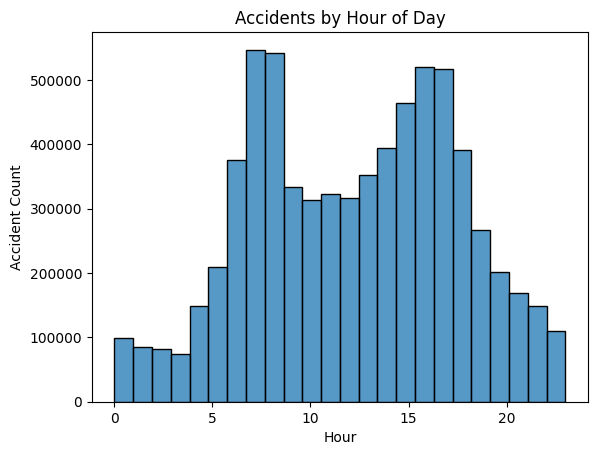

In [27]:
sns.histplot(df_cleaned['Hour'],bins=24)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.show()

**INSIGHTS**

Accidents peak during morning and evening commute hours, reflecting the influence of traffic density on accident frequency

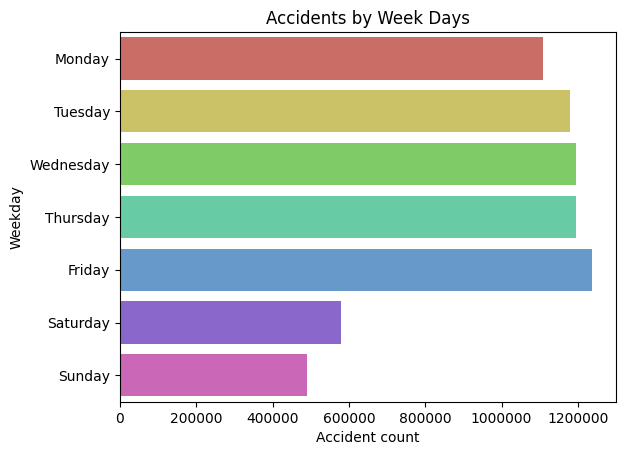

In [28]:
sns.countplot(y='Weekday',data=df_cleaned,palette='hls')
plt.title("Accidents by Week Days")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Accident count")
plt.show()


**INSIGHTS**

Accident frequency peaks on Fridays, followed by Tuesday, Wednesday, and Thursday, indicating higher accident occurrence on weekdays compared to weekends.

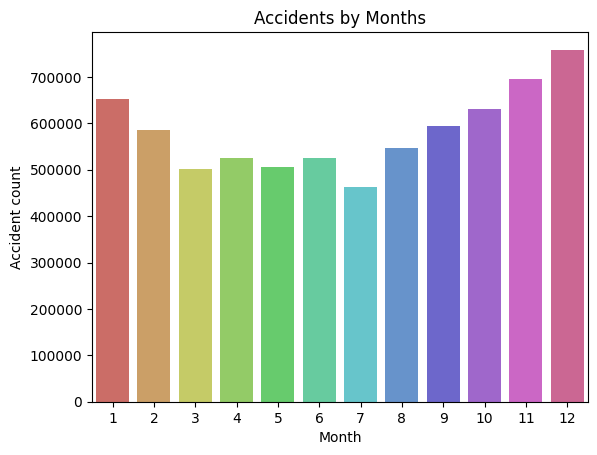

In [29]:
sns.countplot(x='Month',data=df_cleaned,palette='hls')
plt.title("Accidents by Months")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Accident count")
plt.show()

**INSIGHTS**

Higher accident frequency is observed at the start and end of the month, while mid-month periods show relatively lower counts

In [30]:
top_weather = df_cleaned['Weather_Condition'].value_counts().head(10).index


In [31]:
Weather_Severity = pd.crosstab(
    df_cleaned['Weather_Condition'],
    df_cleaned['Severity'],
    normalize='index'
).loc[top_weather]


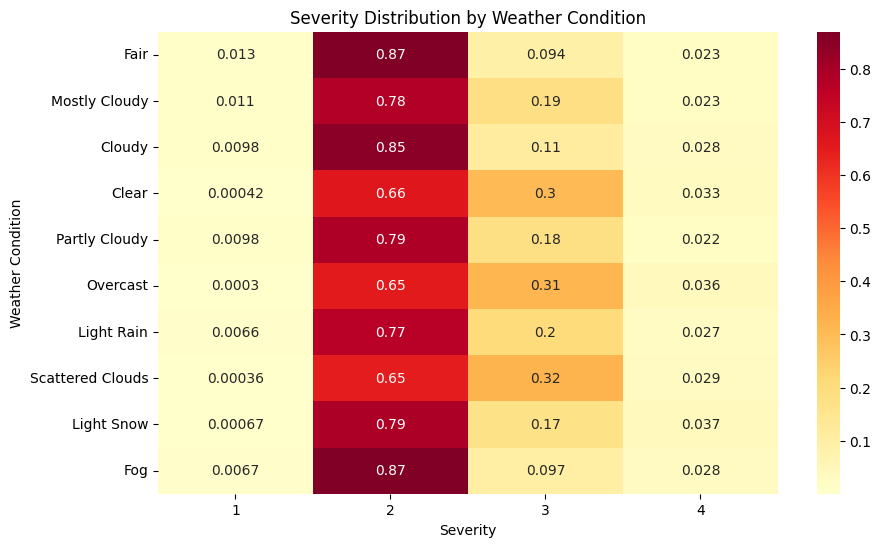

In [32]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    Weather_Severity,
    annot=True,
    cmap='YlOrRd'
)

plt.title("Severity Distribution by Weather Condition")
plt.xlabel("Severity")
plt.ylabel("Weather Condition")
plt.show()


**INSIGHTS**

Severity 2 accidents dominate across all weather conditions, with higher Severity 3 occurrences during clear and cloudy weather, indicating traffic exposure plays a key role.

In [33]:
df_cleaned[['Visibility(mi)', 'Distance(mi)']].describe()


,Visibility(mi),Distance(mi)
count,7.551296e+06,7.728394e+06
mean,9.090376e+00,5.618423e-01
std,2.688316e+00,1.776811e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,1.000000e+01,3.000000e-02
75%,1.000000e+01,4.640000e-01
max,1.400000e+02,4.417500e+02


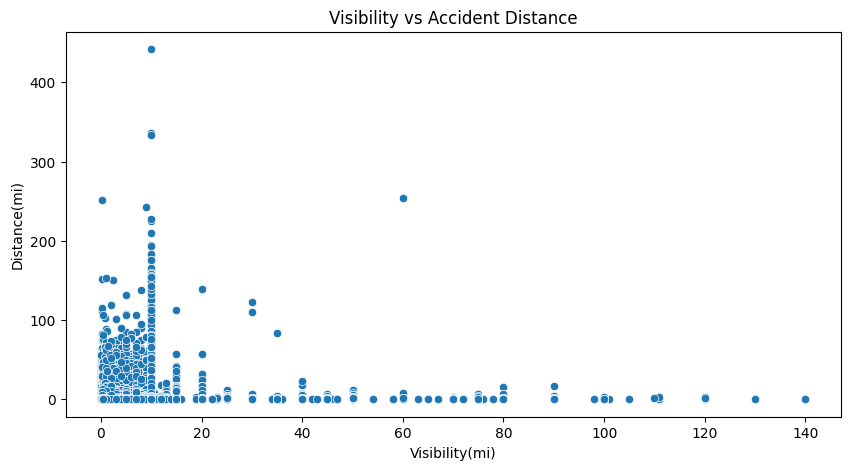

In [34]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='Visibility(mi)',
                y='Distance(mi)',
                data=df_cleaned)
plt.title('Visibility vs Accident Distance')
plt.show()

**INSIGHTS**

Accidents are concentrated at low visibility levels with mostly short distances, and no strong correlation exists between visibility and accident distance.

In [35]:
df_cleaned['Sunrise_Sunset'].value_counts(normalize=True) * 100


Sunrise_Sunset
Day      69.233621
Night    30.766379
Name: proportion, dtype: float64

In [36]:
Time_Severity=pd.crosstab(
    df_cleaned['Sunrise_Sunset'],
    df_cleaned['Severity'],
    normalize='index'
)



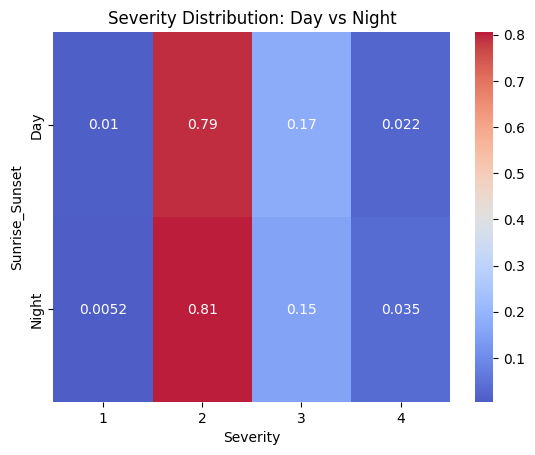

In [37]:
sns.heatmap(Time_Severity , cmap='coolwarm',annot=True,alpha=0.9)
plt.title('Severity Distribution: Day vs Night')
plt.show()

**INSIGHTS**

Severity 2 accidents make up nearly 80% of cases both day and night. Severe accidents are more common at night, while daytime sees slightly more mid-level crashes. Minor accidents are rare, and overall severity increases after dark.


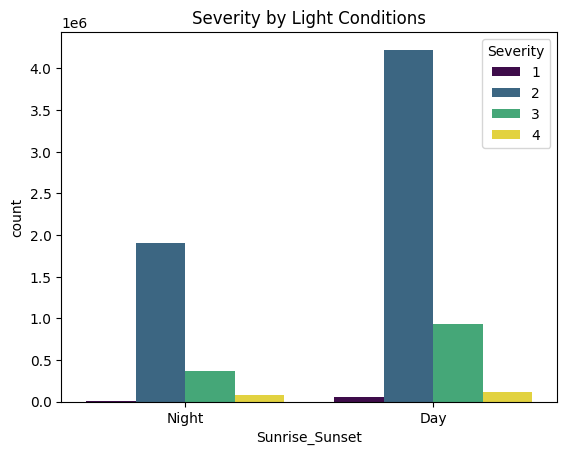

In [38]:
sns.countplot(
    x='Sunrise_Sunset',
    hue='Severity',
    data=df_cleaned,
    palette='viridis'
)
plt.title('Severity by Light Conditions')
plt.show()


**INSIGHTS**

Day has overwhelmingly more incidents, with severity 2 dominating across all light conditions, while sunrise/sunset periods show minimal activity.

Night incidents, though far fewer in total, show a slightly higher proportion of severe cases (severity 3-4) compared to day, suggesting nighttime accidents may be more serious when they occur.